# House Prices: Advanced Regression Techniques"

## Análsis exploratorio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme(style="whitegrid")

filePath = './train.csv'

df = pd.read_csv(filePath, encoding="ISO-8859-1")
print(df.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

## Descripción de las Variables del Dataset

| Variable       | Descripción |
|---------------|-------------|
| **MSSubClass** | Tipo de vivienda involucrada en la venta (código numérico). |
| **MSZoning** | Clasificación de zonificación general de la venta. |
| **LotFrontage** | Pies lineales de calle conectados a la propiedad. |
| **LotArea** | Tamaño del lote en pies cuadrados. |
| **Street** | Tipo de acceso por carretera a la propiedad. |
| **Alley** | Tipo de acceso al callejón. |
| **LotShape** | Forma general de la propiedad. |
| **LandContour** | Nivel de la propiedad en relación con su entorno. |
| **Utilities** | Tipo de servicios públicos disponibles. |
| **LotConfig** | Configuración del lote. |
| **LandSlope** | Pendiente del terreno. |
| **Neighborhood** | Ubicación física dentro de los límites de la ciudad. |
| **Condition1** | Proximidad a diversas condiciones. |
| **Condition2** | Segunda proximidad a diversas condiciones (si hay más de una). |
| **BldgType** | Tipo de vivienda. |
| **HouseStyle** | Estilo de la vivienda. |
| **OverallQual** | Calidad general de los materiales y el acabado de la casa. |
| **OverallCond** | Condición general de la casa. |
| **YearBuilt** | Año de construcción original. |
| **YearRemodAdd** | Año de remodelación (igual a `YearBuilt` si no ha habido cambios). |
| **RoofStyle** | Tipo de techo. |
| **RoofMatl** | Material del techo. |
| **Exterior1st** | Cubierta exterior principal de la casa. |
| **Exterior2nd** | Cubierta exterior secundaria de la casa (si hay más de un material). |
| **MasVnrType** | Tipo de revestimiento de mampostería. |
| **MasVnrArea** | Área del revestimiento de mampostería en pies cuadrados. |
| **ExterQual** | Calidad de los materiales en el exterior. |
| **ExterCond** | Condición actual del material en el exterior. |
| **Foundation** | Tipo de cimentación. |
| **BsmtQual** | Altura del sótano. |
| **BsmtCond** | Condición general del sótano. |
| **BsmtExposure** | Exposición del sótano a nivel de jardín. |
| **BsmtFinType1** | Tipo de acabado del sótano 1. |
| **BsmtFinSF1** | Pies cuadrados de área terminada del sótano tipo 1. |
| **BsmtFinType2** | Tipo de acabado del sótano 2. |
| **BsmtFinSF2** | Pies cuadrados de área terminada del sótano tipo 2. |
| **BsmtUnfSF** | Pies cuadrados sin terminar del sótano. |
| **TotalBsmtSF** | Área total en pies cuadrados del sótano. |
| **Heating** | Tipo de calefacción. |
| **HeatingQC** | Calidad y estado del sistema de calefacción. |
| **CentralAir** | Aire acondicionado centralizado (Sí/No). |
| **Electrical** | Sistema eléctrico. |
| **1stFlrSF** | Pies cuadrados del primer piso. |
| **2ndFlrSF** | Pies cuadrados del segundo piso. |
| **LowQualFinSF** | Pies cuadrados de áreas terminadas de baja calidad. |
| **GrLivArea** | Área habitable sobre el nivel del suelo en pies cuadrados. |
| **BsmtFullBath** | Número de baños completos en el sótano. |
| **BsmtHalfBath** | Número de medios baños en el sótano. |
| **FullBath** | Número de baños completos sobre el nivel del suelo. |
| **HalfBath** | Número de medios baños sobre el nivel del suelo. |
| **Bedroom** | Número de habitaciones sobre el nivel del suelo (excluye sótanos). |
| **Kitchen** | Número de cocinas sobre el nivel del suelo. |
| **KitchenQual** | Calidad de la cocina. |
| **TotRmsAbvGrd** | Número total de habitaciones sobre el nivel del suelo (excluye baños). |
| **Functional** | Funcionalidad del hogar. |
| **Fireplaces** | Número de chimeneas. |
| **FireplaceQu** | Calidad de la chimenea. |
| **GarageType** | Ubicación del garaje. |
| **GarageYrBlt** | Año de construcción del garaje. |
| **GarageFinish** | Acabado interior del garaje. |
| **GarageCars** | Tamaño del garaje en capacidad de autos. |
| **GarageArea** | Tamaño del garaje en pies cuadrados. |
| **GarageQual** | Calidad del garaje. |
| **GarageCond** | Condición del garaje. |
| **PavedDrive** | Tipo de pavimentación de la entrada. |
| **WoodDeckSF** | Área de la terraza de madera en pies cuadrados. |
| **OpenPorchSF** | Área del porche abierto en pies cuadrados. |
| **EnclosedPorch** | Área del porche cerrado en pies cuadrados. |
| **3SsnPorch** | Área del porche de tres estaciones en pies cuadrados. |
| **ScreenPorch** | Área del porche con mosquitero en pies cuadrados. |
| **PoolArea** | Área de la piscina en pies cuadrados. |
| **PoolQC** | Calidad de la piscina. |
| **Fence** | Calidad de la cerca. |
| **MiscFeature** | Característica adicional no cubierta en otras categorías. |
| **MiscVal** | Valor en dólares de la característica adicional. |
| **MoSold** | Mes en que se vendió la casa. |
| **YrSold** | Año en que se vendió la casa. |
| **SaleType** | Tipo de venta. |
| **SaleCondition** | Condición de la venta. |
| **SalePrice** | **Precio de venta de la vivienda (variable objetivo).** |


### Separación de variables categoricas y numericas

In [2]:
df_numerico = df.select_dtypes(include=['number']).copy()

print(df_numerico.head())

df_numerico.info()


   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0

## Selección de Variables Numéricas

Para facilitar el análisis exploratorio, se han separado las variables numéricas de las categóricas. Se eliminaron las variables de tipo texto y categóricas, dejando únicamente aquellas que contienen datos numéricos.

### **Resultado:**
Se ha obtenido un nuevo DataFrame (`df_numerico`) que contiene exclusivamente las variables numéricas, lo que permitirá realizar análisis estadísticos y de correlación de manera más eficiente. 

**Características del nuevo DataFrame:**
- **Número de columnas:** 38 variables numéricas.
- **Número de filas:** Igual al dataset original.
- **Valores nulos NO han sido modificados**, para analizarlos antes de decidir cómo manejarlos.


In [3]:
df_numerico.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Hallazgos en el describe:
1. Distribución sesgada de algunas variables:
    - LotArea (tamaño del lote): La media es 10,516 pies cuadrados, pero el máximo llega a 215,245, lo que sugiere la presencia de valores atípicos extremos.
    - SalePrice (precio de venta): Hay una gran diferencia entre la media ($180,921) y el máximo ($755,000), lo que indica una posible distribución sesgada.
2. Valores atípicos notables:
    - LotFrontage (frente del lote): Tiene un máximo de 313 pies, mientras que el percentil 75% es 79 pies. Esto indica que hay terrenos con frentes extremadamente grandes.
    - MasVnrArea (área de mampostería): La mayoría de las casas no tienen mampostería (mediana = 0), pero algunas tienen hasta 1,600 pies cuadrados
    - BsmtFinSF1 (área terminada del sótano 1): El máximo es 5,644 pies cuadrados, pero la mediana es 383.5 pies cuadrados, sugiriendo que hay pocos sótanos muy grandes.
    - PoolArea (área de la piscina): La mayoría de las casas no tienen piscina (mediana = 0), pero algunas tienen hasta 738 pies cuadrados.
3. Datos con gran cantidad de ceros:
    - Varias variables como EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal tienen una mediana de 0, lo que indica que la mayoría de las casas no tienen estos elementos
4. Distribución del año de construcción y remodelación:
    - YearBuilt y YearRemodAdd: El mínimo es 1872, mientras que el máximo es 2010. Podemos analizar la evolución de los precios con respecto a la antigüedad de la casa.
5. Número de baños y habitaciones:
    - FullBath y HalfBath: La media de baños completos es 1.56, lo que sugiere que la mayoría de las casas tienen 1 o 2 baños completos, pero algunas pueden tener hasta 3 o más.
    - TotRmsAbvGrd (Total de habitaciones sobre el nivel del suelo): Rango entre 2 y 14 habitaciones, lo que puede influir en el precio de manera significativa.

## Identificación de Valores Atípicos

El primer paso dentro de nuestro análisis exploratorio consiste en identificar **valores atípicos** dentro de las variables numéricas seleccionadas. Los valores atípicos son observaciones que se alejan significativamente de la tendencia general de los datos y pueden afectar la calidad de nuestros modelos predictivos.
### ¿Por qué es importante?
En regresión lineal, los valores extremos pueden distorsionar la relación entre las variables predictoras y el precio de las casas, lo que puede llevar a:
- Coeficientes de regresión sesgados.
- Mal desempeño predictivo.
- Modelos que no generalizan bien a nuevos datos.
### Estrategia
Para cada variable numérica, se analizará:
- **Distribución visual mediante boxplots**.
- **Distribución estadística con histogramas**.
- **Cálculo de rango intercuartil (IQR)** para detección automática.

Este análisis permitirá decidir si se deben transformar, escalar, o incluso remover observaciones en casos extremos.

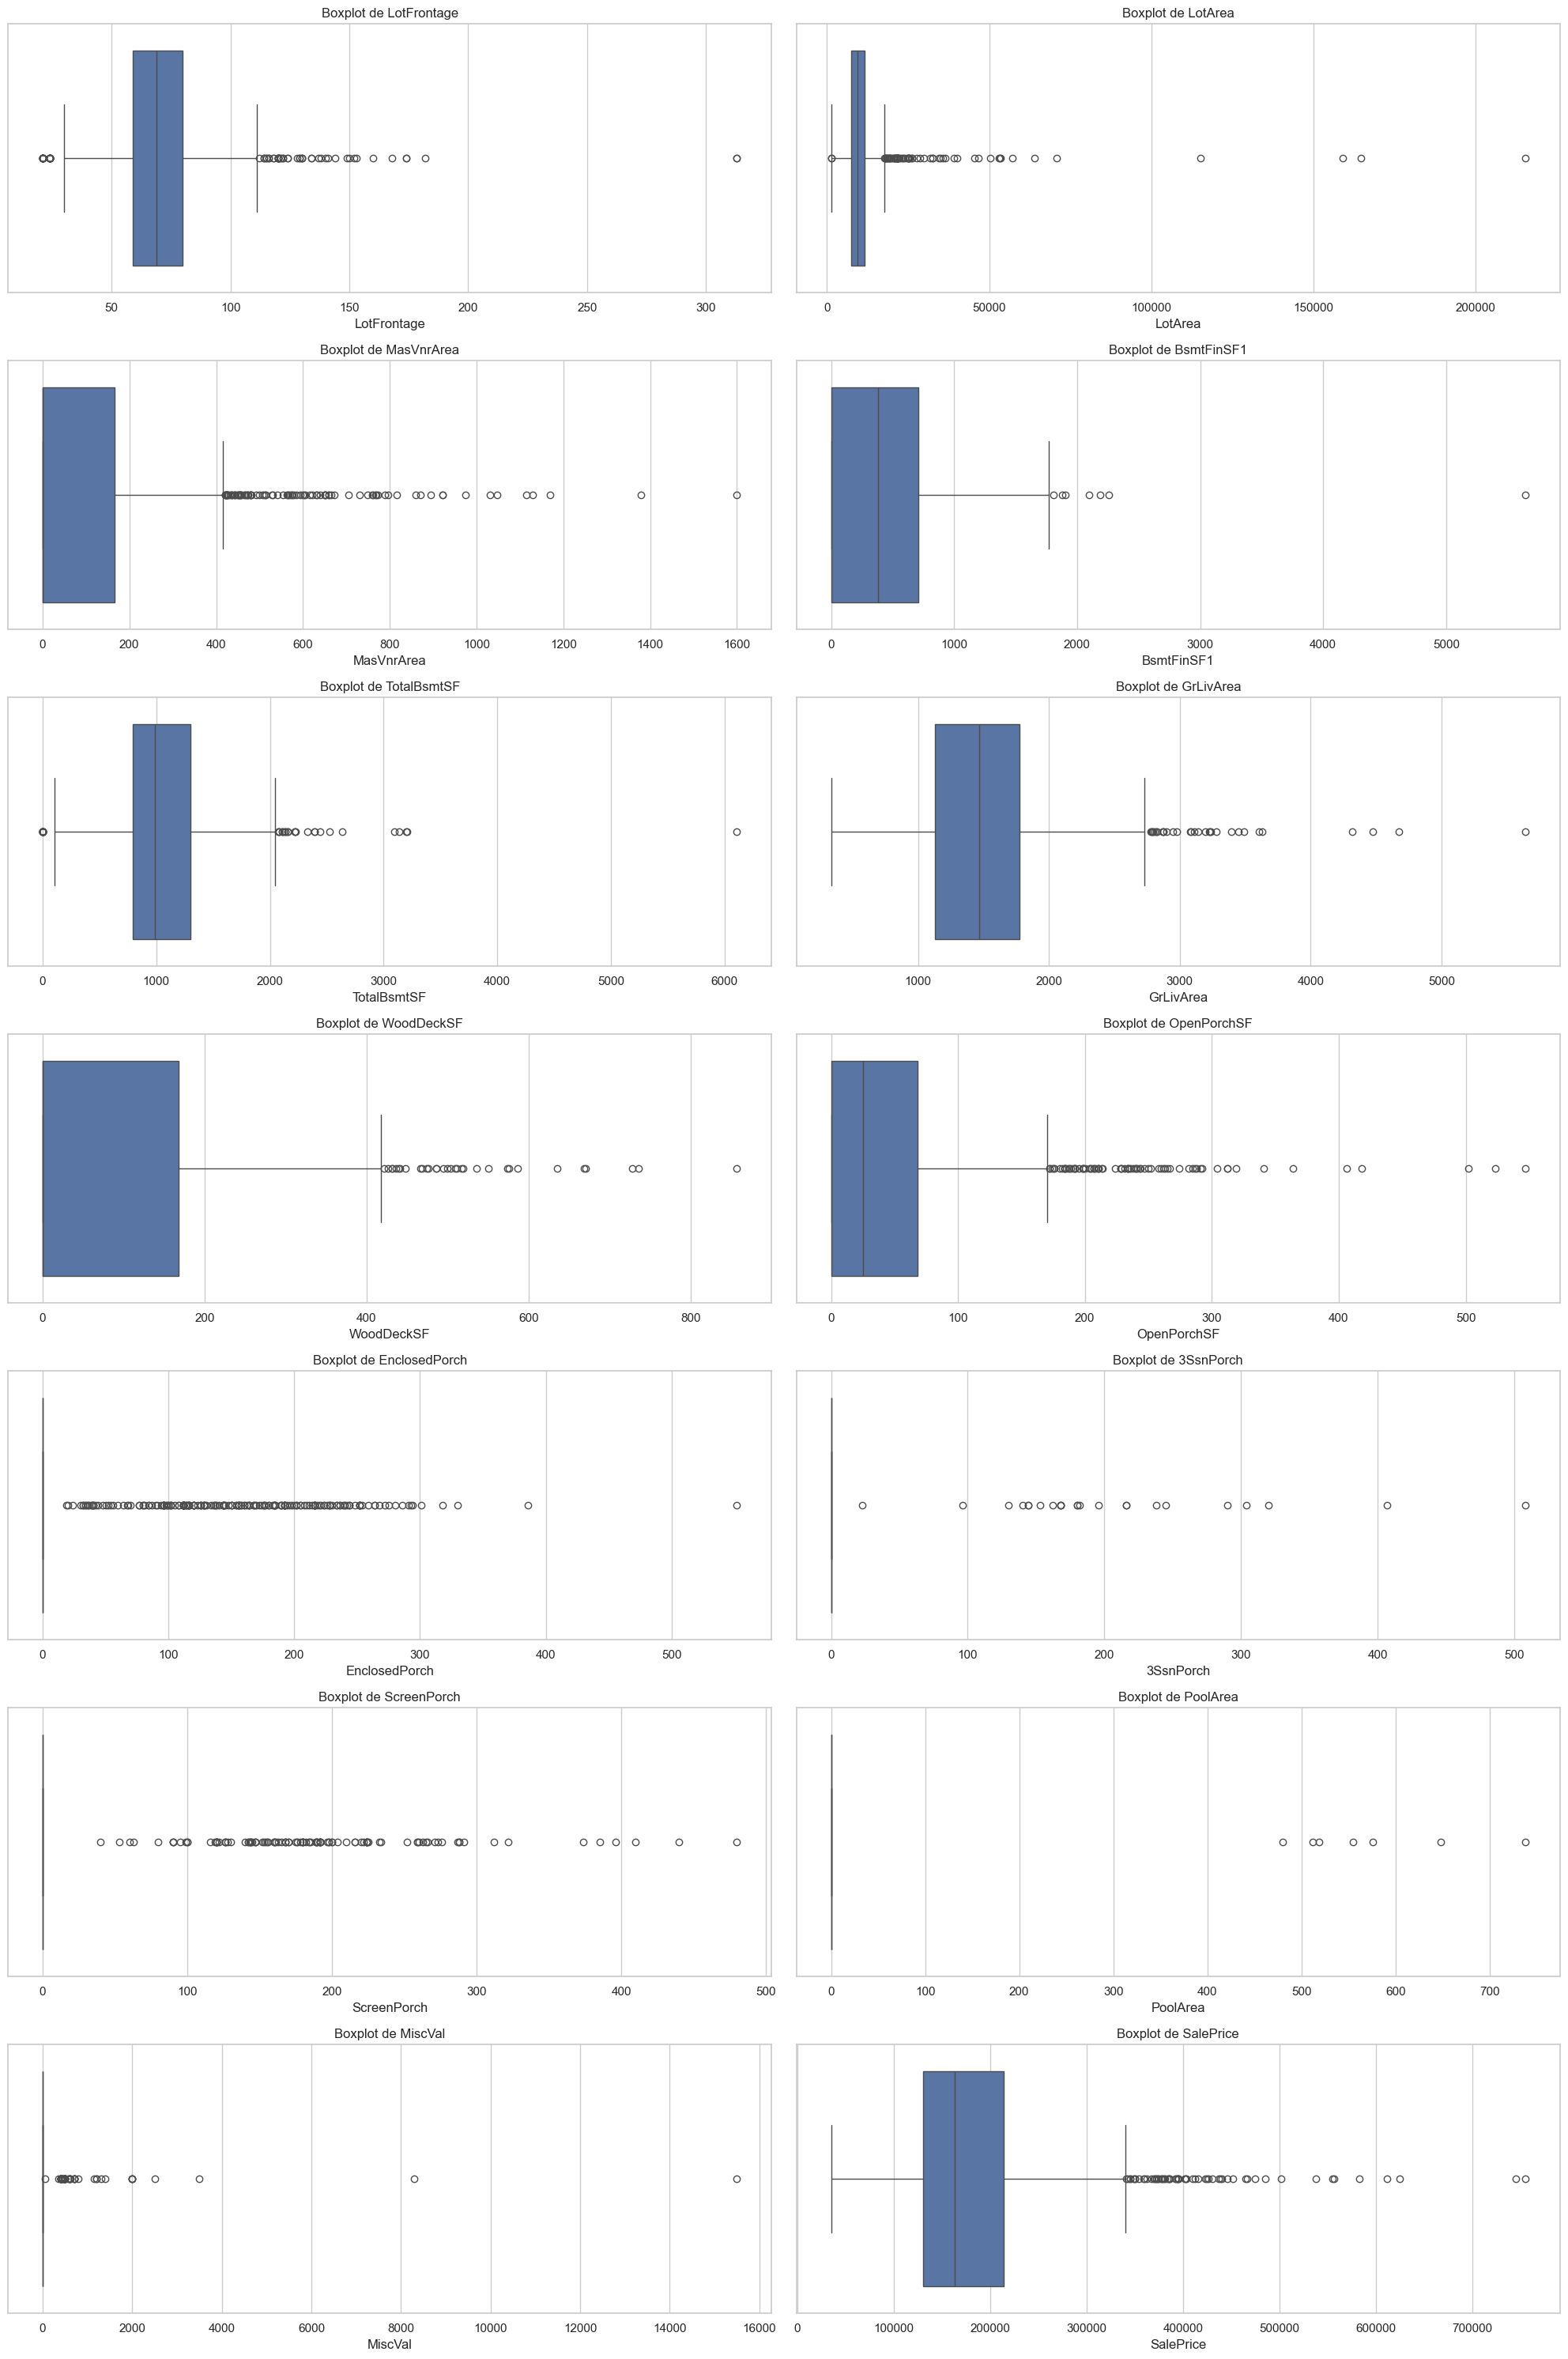

,Outliers Detectados
EnclosedPorch,208
ScreenPorch,116
MasVnrArea,96
LotFrontage,88
OpenPorchSF,77
LotArea,69
TotalBsmtSF,61
SalePrice,61
MiscVal,52
WoodDeckSF,32


In [4]:
variables_numericas = [
    'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 
    'TotalBsmtSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF', 
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
    'MiscVal', 'SalePrice'
]

plt.figure(figsize=(20, 30))

for i, col in enumerate(variables_numericas, 1):
    plt.subplot(7, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()

outliers = {}

for col in variables_numericas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outliers[col] = outliers_count

outliers_df = pd.DataFrame.from_dict(outliers, orient='index', columns=['Outliers Detectados'])
outliers_df.sort_values(by='Outliers Detectados', ascending=False)


## Análisis de Valores Atípicos
Se realizó un análisis gráfico y cuantitativo de valores atípicos en variables numéricas clave. Utilizamos **boxplots** para identificar visualmente puntos extremos, y adicionalmente calculamos los valores atípicos usando el **Rango Intercuartil (IQR)** para cada variable.
### Hallazgos relevantes
- La mayoría de las variables relacionadas con **espacios exteriores** (porches, terrazas, piscinas) presentan un alto número de valores atípicos. Esto indica que hay propiedades con áreas significativamente más grandes de lo común, lo cual puede estar asociado a viviendas de lujo o propiedades con amenidades especiales.
- Variables clave como **LotArea**, **LotFrontage** y **SalePrice** también presentan valores atípicos considerables. Esto refuerza la idea de que en el mercado hay propiedades excepcionalmente grandes y caras, que podrían sesgar nuestros modelos.
- La variable **MasVnrArea** tiene varios valores atípicos. Es posible que esto refleje propiedades con extensos acabados en mampostería, lo cual también puede tener un impacto directo en el precio.
- Destaca que **EnclosedPorch** es la variable con más outliers (208), lo cual es inusual para una característica que no suele ser tan determinante en el valor de una propiedad.


## Análisis de la Distribución de SalePrice

La variable `SalePrice` es nuestra variable objetivo (target), por lo que es crucial entender su distribución antes de construir modelos. En datasets inmobiliarios, es común que los precios de las viviendas no sigan una distribución normal, sino que estén **sesgados hacia la derecha** debido a la presencia de propiedades de lujo o muy exclusivas.

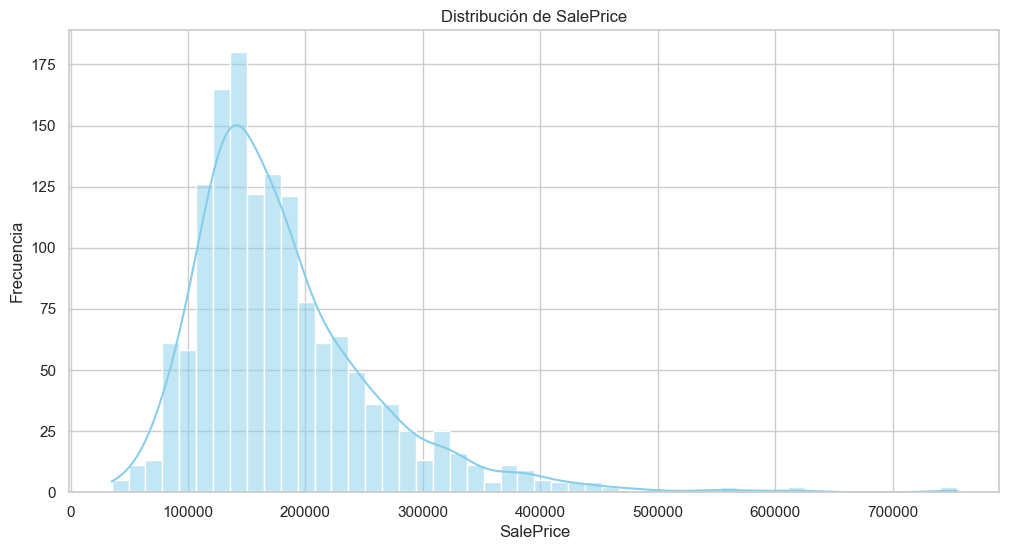

Sesgo (Skewness): 1.88
Curtosis (Kurtosis): 6.51


In [5]:
plt.figure(figsize=(12, 6))

sns.histplot(df['SalePrice'], kde=True, color='skyblue', bins=50)
plt.title('Distribución de SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frecuencia')
plt.show()

from scipy.stats import skew, kurtosis

skewness = skew(df['SalePrice'])
kurt = kurtosis(df['SalePrice'])

print(f'Sesgo (Skewness): {skewness:.2f}')
print(f'Curtosis (Kurtosis): {kurt:.2f}')


## Análisis de la Distribución de `SalePrice`
El histograma muestra que `SalePrice` presenta una distribución **claramente sesgada hacia la derecha** (right skewed), lo cual es típico en datasets inmobiliarios donde la mayoría de las propiedades tienen precios moderados, pero existen algunas propiedades de lujo o de gran tamaño con precios muy superiores al promedio.
#### Interpretación
- **Sesgo (Skewness) = 1.88:** 
  - Un sesgo positivo indica una cola larga hacia la derecha, lo cual confirma lo observado visualmente.
  - Idealmente, para regresión lineal, quisiéramos un sesgo cercano a **0** (distribución simétrica).
- **Curtosis = 6.51:** 
  - La curtosis indica una distribución **leptocúrtica**, es decir, con una concentración alta de datos alrededor de la media y colas más largas de lo normal.
  - Esto es consistente con la presencia de propiedades **de lujo** o extremadamente caras que actúan como valores atípicos en el extremo superior.
Dado el alto sesgo y curtosis observados, una **transformación logarítmica** sobre `SalePrice` es altamente recomendable antes de construir modelos de regresión. Esta transformación ayudará a:
- **Reducir el sesgo.**
- **Acercar la distribución a la normalidad.**
- **Mejorar la linealidad de las relaciones con las variables predictoras.**

## Transformación Logarítmica de SalePrice

Dado que `SalePrice` presenta una **distribución sesgada** y de acuerdo al análisis previo (skewness=1.88, kurtosis=6.51), es recomendable aplicar una transformación logarítmica. Esta transformación es útil cuando:

- La variable objetivo tiene una **cola larga hacia la derecha**.
- Hay grandes diferencias entre propiedades regulares y de lujo.
- Se quiere reducir la influencia de valores atípicos extremos.


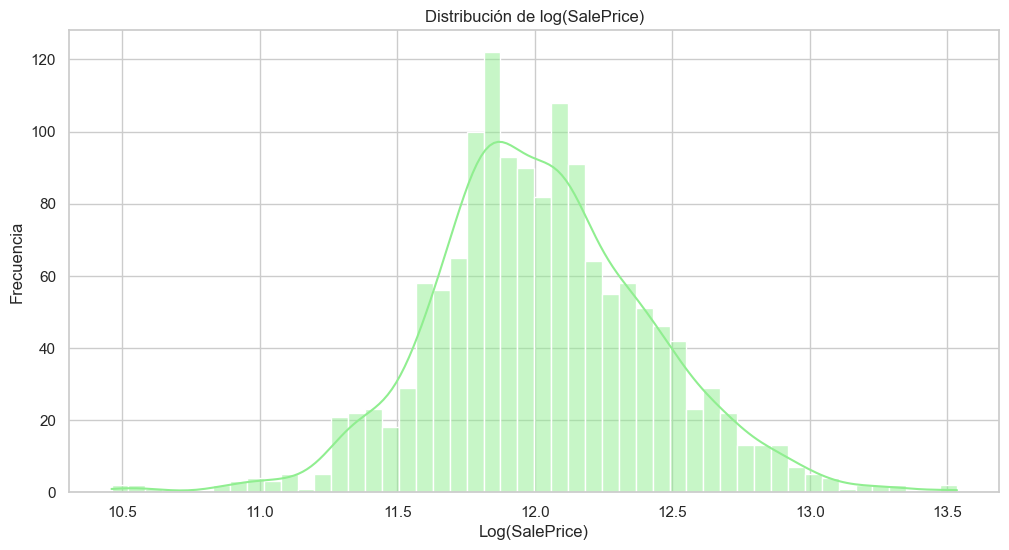

Sesgo después de log: 0.12
Curtosis después de log: 0.80


In [6]:
df['LogSalePrice'] = np.log(df['SalePrice'])

plt.figure(figsize=(12, 6))

sns.histplot(df['LogSalePrice'], kde=True, color='lightgreen', bins=50)
plt.title('Distribución de log(SalePrice)')
plt.xlabel('Log(SalePrice)')
plt.ylabel('Frecuencia')
plt.show()

log_skewness = skew(df['LogSalePrice'])
log_kurt = kurtosis(df['LogSalePrice'])

print(f'Sesgo después de log: {log_skewness:.2f}')
print(f'Curtosis después de log: {log_kurt:.2f}')


- El **sesgo** se redujo significativamente, de 1.88 a **0.12**, lo que indica que la distribución logarítmica es prácticamente simétrica.
- La **curtosis** se redujo también de 6.51 a **0.81**, indicando que ahora hay menos concentración extrema alrededor de la media y colas menos pronunciadas.
- Visualmente, `log(SalePrice)` se comporta mucho más parecido a una distribución **normal**.

## Análisis de Correlación y Relaciones Clave con `LogSalePrice`

### Objetivo
Tras transformar `SalePrice` a `LogSalePrice`, es importante entender cómo se relacionan las variables numéricas predictoras con esta nueva variable objetivo. Este análisis es clave para:
- **Identificar predictores relevantes**.
- **Seleccionar variables para los modelos.**
- **Detectar relaciones lineales o no lineales.**

### Estrategia
1. Calcular un **mapa de correlación (heatmap)** para visualizar la relación entre `LogSalePrice` y todas las variables numéricas.
2. Realizar gráficos bivariados (scatterplots) entre `LogSalePrice` y las variables que muestren **alta correlación**.
3. Extraer conclusiones sobre qué variables son más prometedoras como predictoras para el modelo de regresión.


Top 10 Variables más correlacionadas con LogSalePrice:
LogSalePrice    1.000000
SalePrice       0.948374
OverallQual     0.817184
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
Name: LogSalePrice, dtype: float64


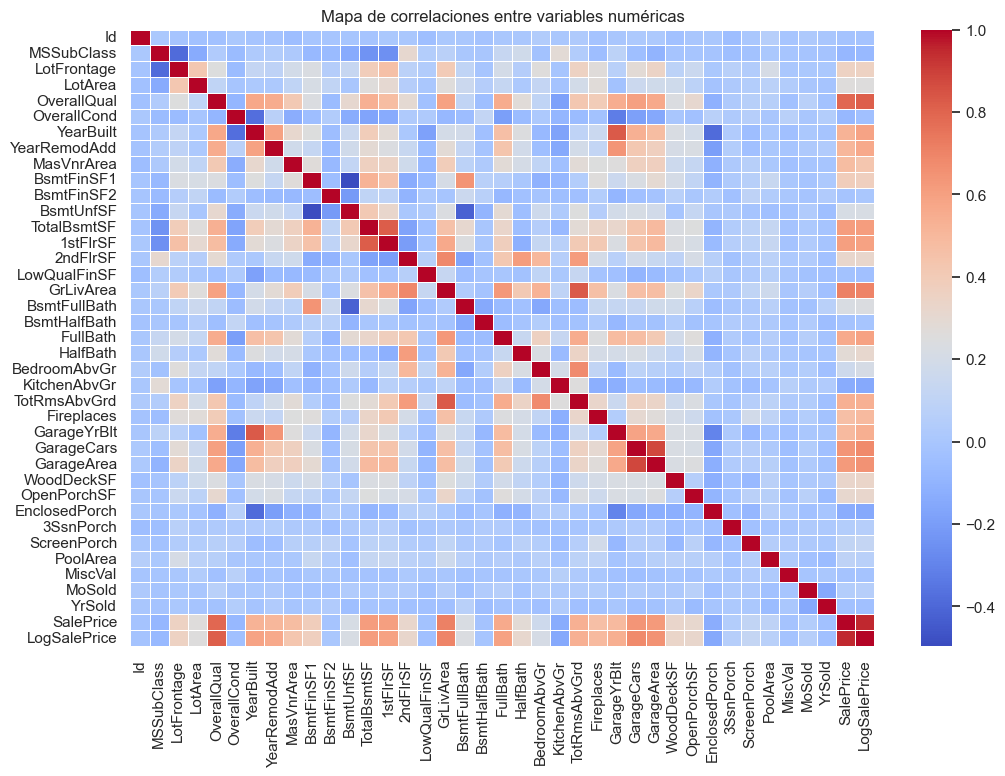

In [7]:
df_numerico['LogSalePrice'] = np.log(df['SalePrice'])

correlation_matrix = df_numerico.corr()

correlation_with_target = correlation_matrix['LogSalePrice'].sort_values(ascending=False)

print("Top 10 Variables más correlacionadas con LogSalePrice:")
print(correlation_with_target.head(11))  

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title('Mapa de correlaciones entre variables numéricas')
plt.show()


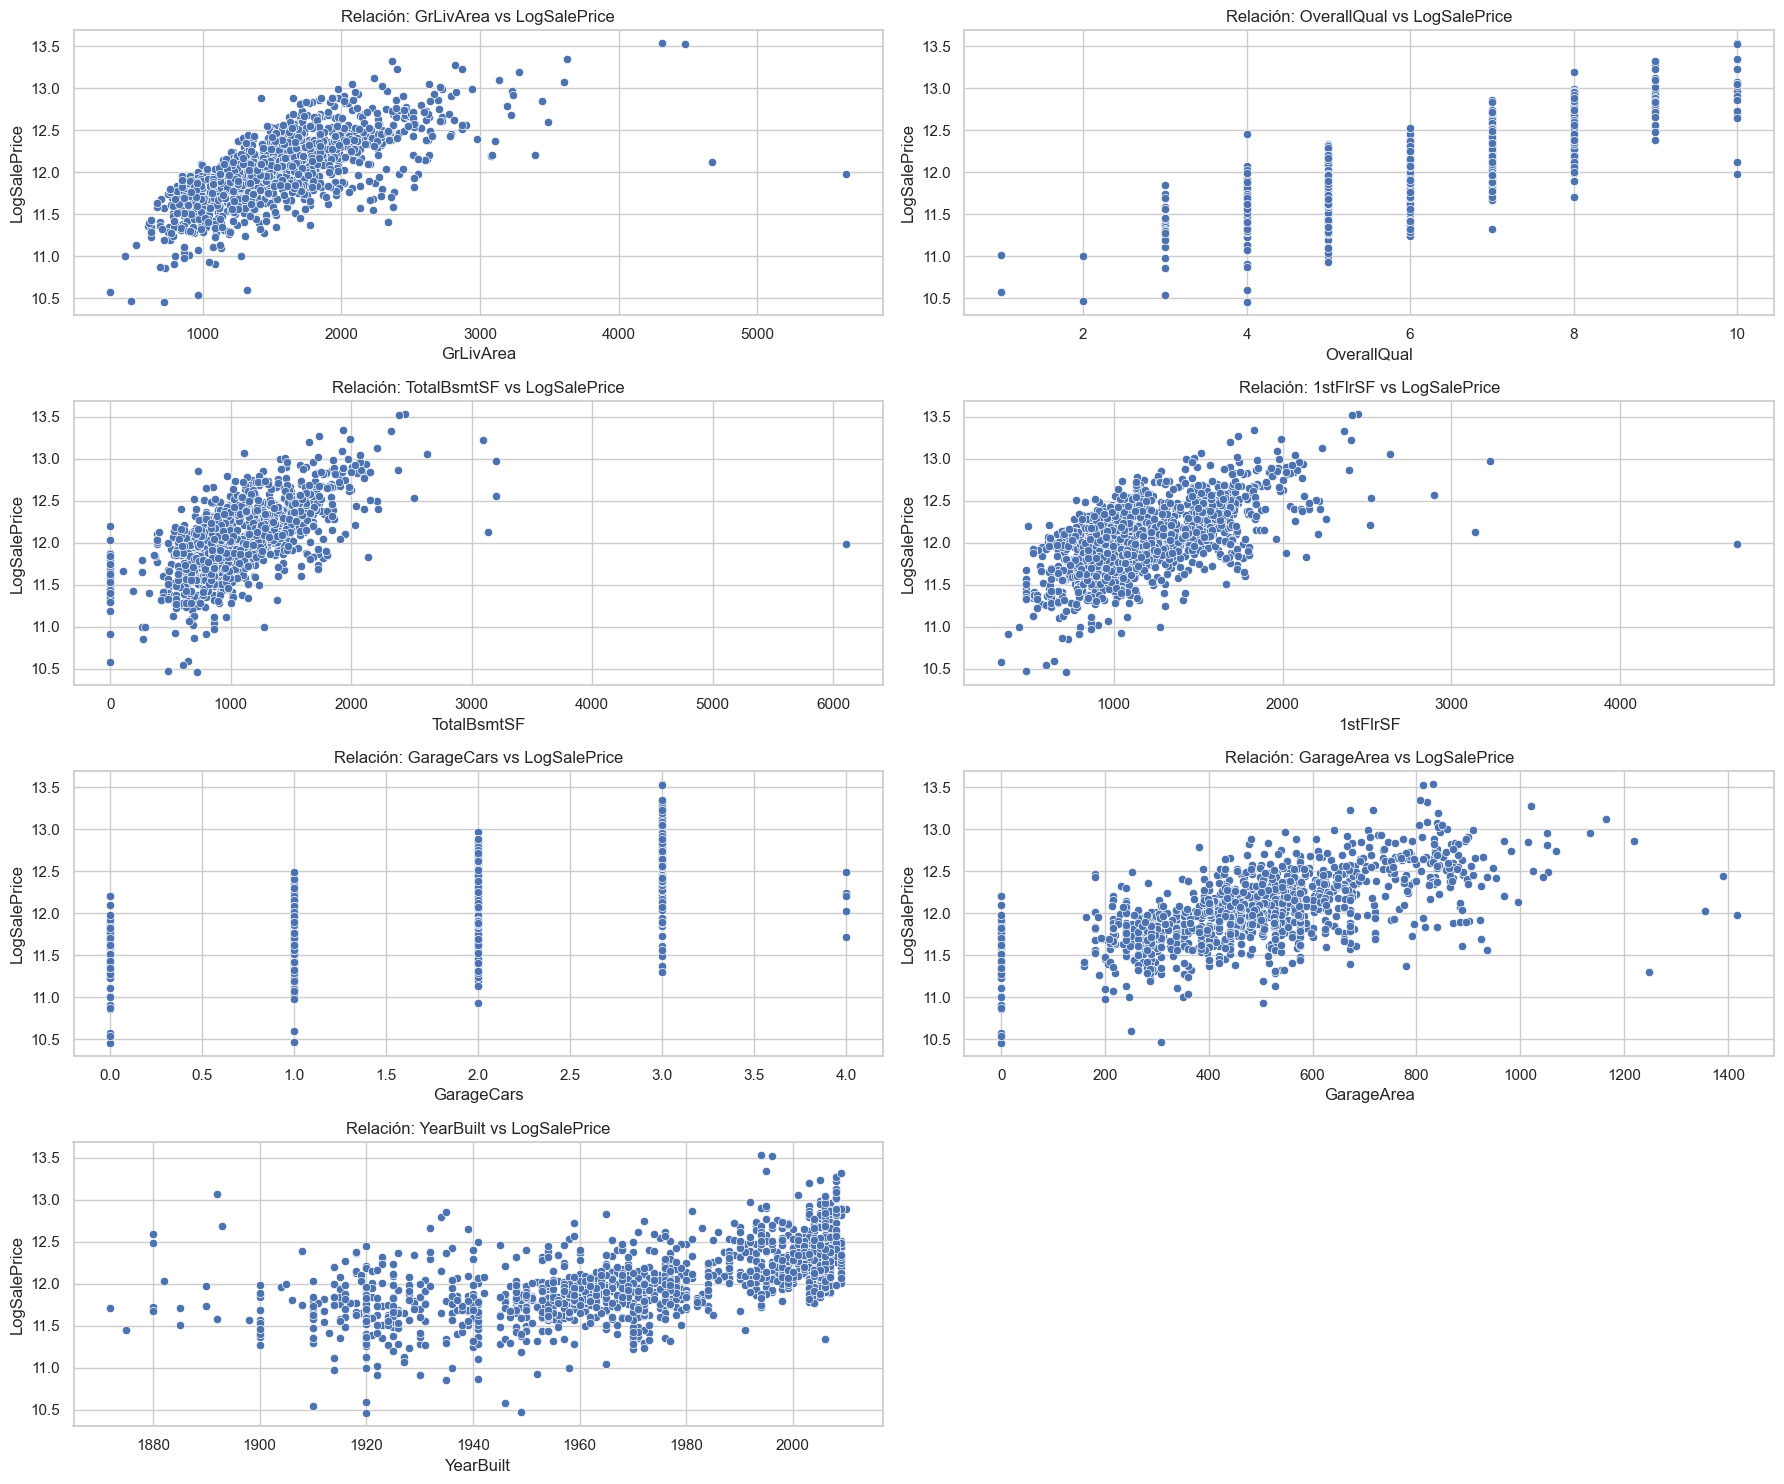

In [8]:
top_predictors = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GarageCars', 'GarageArea', 'YearBuilt']

plt.figure(figsize=(18, 15))

for i, col in enumerate(top_predictors, 1):
    plt.subplot(4, 2, i)
    sns.scatterplot(x=df_numerico[col], y=df_numerico['LogSalePrice'])
    plt.title(f'Relación: {col} vs LogSalePrice')

plt.tight_layout()
plt.show()
